# CH04.로지스틱 회귀 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.   (데이터) 데이터 불러오기 및 특성 스케일링하기
2.  (데이터) 학습 데이터와 테스트 데이터 구분하기
3. (모델) 모델 구성하기
4. (모델 학습) 모델 학습하기
5. (모델 성능 평가) 모델 성능 평가하기
6. (결과) 모델 동작 시각화하기

## [실습 4-1] scikit-learn 라이브러리를 이용한 로지스틱 회귀 모델




### 0. 사용할 라이브러리와 패키지 불러오기




In [7]:
# numpy, matplotlib, pandas를 각각 np, plt, pd로 재지정해 불러온다.
# scikit-learn(sklearn) 불러오고, 사용할 패키지를 불러온다.
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1. 데이터 불러오기 및 특성 스케일링하기




In [8]:
# 데이터(Social_Network_Ads.csv) 불러오고 특성 스케일링을 통해 표준화한다.
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X) # 전체 데이터 X를 평균과 분산을 표준 정규 분포 형태로 변환

### 2. 학습 데이터와 테스트 데이터 구분하기




In [9]:
# X(특징 벡터)와 y(실제값)을 학습 데이터와 테스트 데이터로 분할한다.
# test_size를 통해 학습 데이터와 테스트 데이터의 비율을 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 3. 모델 구성하기




In [10]:
# scikit-learn 라이브러리의 로지스틱 회귀 모델을 불러온다.
classifier = LogisticRegression()

### 4. 모델 학습하기




In [11]:
# fit 함수를 통해 모델을 학습한다.
# fit 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
classifier.fit(X_train, y_train) # 학습 단계에서는 학습 데이터만 사용됨
w_1 = classifier.coef_
w_0 = classifier.intercept_
print(w_1)
print(w_0)

[[2.51513829 1.22447387]]
[-1.15196001]


### 5. 모델 성능 평가하기




In [12]:
# predict 함수를 통해 로지스틱 회귀로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
y_pred = classifier.predict(X_test) # 예측 단계에서는 테스트 데이터만 사용됨
result = sklearn.metrics.accuracy_score(y_test, y_pred) # 모델의 정확도
print(result)

0.84


### 6. 모델 동작 시각화하기




<ipython-input-14-6dccd27c6fcc>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


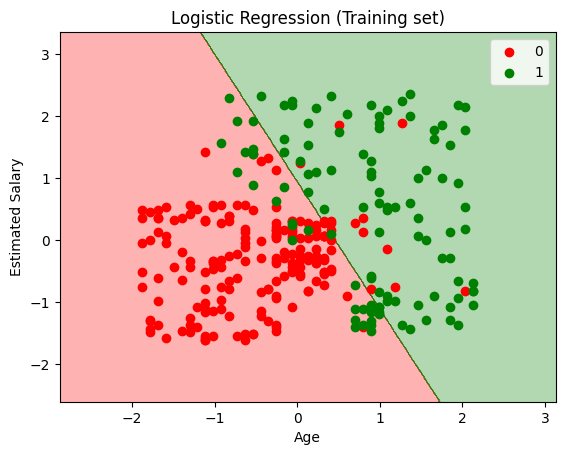

In [14]:
# 학습 데이터셋을 시각화한다.
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-15-6bd533e9a18e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


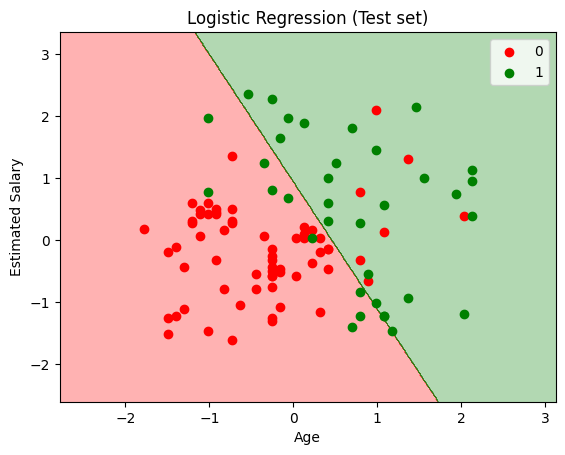

In [15]:
# 테스트 데이터셋을 시각화한다.
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## [실습 4-2] 함수를 직접 정의해 구현한 로지스틱 회귀 모델




### 1. 데이터 불러오기 및 특성 스케일링하기



In [16]:
# 데이터(Social_Network_Ads.csv) 불러오고 특성 스케일링을 통해 표준화한다.
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X) # 학습 데이터 X를 평균과 분산을 표준 정규 분포 형태로 변환

### 2. 학습 데이터와 테스트 데이터 구분하기




In [17]:
# X(특징 벡터)와 y(실제값)을 학습 데이터셋과 테스트 데이터셋으로 분할한다.
# test_size를 통해 학습 데이터와 테스트 데이터의 비율을 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 3. 모델 구성하기




In [18]:
# 로지스틱 회귀를 위해 필요한 함수 및 변수를 선언한다.
w_2 = 1 # 가중치 초기화
w_1 = 1
w_0 = 1
lr = 0.1 # 학습률(일반적인 경우 0 < lr < 1)

def sigmoid(x):
		return 1.0/(1 + np.exp(-x)) # exp(x)는 지수 함수(e^(x))와 동일한 표현

def BCE_loss(y, y_hat): # Binary Cross Entropy loss
		loss = np.mean(y * (np.log(y_hat)) + (1-y) * np.log(1-y_hat))
		return -loss

def gradient_descent(X, y, y_hat): # 로지스틱 회귀의 업데이트 식 확인
		global w_2, w_1, w_0
		w_2 = w_2 - lr * (-X[0]) * (y - y_hat)
		w_1 = w_1 - lr * (-X[1]) * (y - y_hat)
		w_0 = w_0 - lr * (-1) * (y - y_hat)

### 4. 모델 학습하기




In [19]:
# 구현한 함수를 통해 모델을 학습한다.
# 이 함수에는 1) 가중치 초기화 2) 손실 함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
for epoch in range(100): # 원하는 만큼 반복 횟수 설정
		for X, y in zip(X_train, y_train):
				y_hat = sigmoid(X[0] * w_2 + X[1] * w_1 + w_0) # 모델의 예측값 추출
				loss = BCE_loss(y, y_hat) # 손실 함수의 값 계산
				gradient_descent(X, y, y_hat) # 손실 함수의 값을 통한 경사하강법으로 w1, w0 업데이트
print(w_2, w_1, w_0)

2.643412401154685 1.141416398831262 -1.2319833310098909


### 5. 모델 성능 평가하기




In [20]:
# predict 함수를 통해 로지스틱 회귀로 얻은 예측값을 추출해 테스트 데이터로 평가한다.
def predict(X):
    global w_2, w_1, w_0
    preds = sigmoid(X[:, 0] * w_2 + X[:, 1] * w_1 + w_0) # 특징 벡터와 가중치를 활용
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds] # 예측 결과가 0.5 이상이면 1, 그렇지 않으면 0
    return np.array(pred_class)

y_hat = predict(X_test)
result = sklearn.metrics.accuracy_score(y_test, y_hat)
print(result)

0.87


### 6. 모델 동작 시각화하기



<ipython-input-21-195b5bc13b96>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


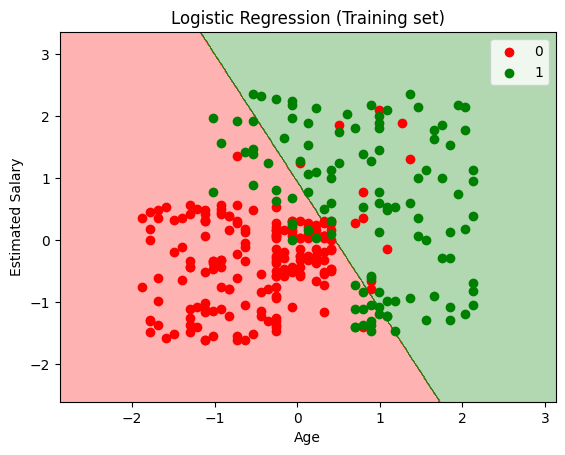

In [21]:
# 학습 데이터셋을 시각화한다(빨간색).
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-22-61bbee84cade>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


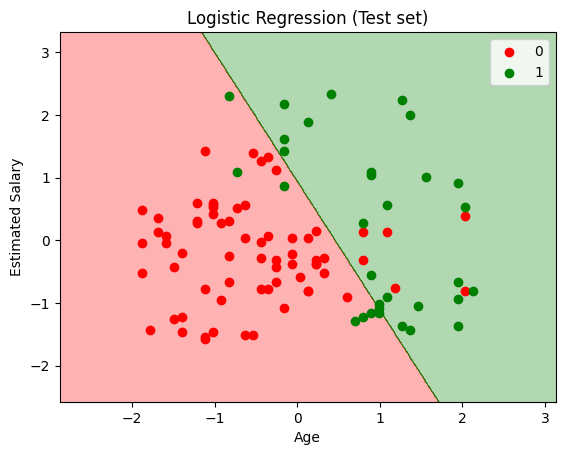

In [22]:
# 테스트 데이터셋을 시각화한다(초록색).
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.3, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()